<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Unsupervised%20Learning/PCA/USL_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Importing & Setting Up Required Libraries

In [6]:
import pandas as pd
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Step 2: Defining & Summarizing the Dataset

In [17]:
# Generate a synthetic dataset with 1000 samples, 7 features (4 informative and 3 redundant) for classification.
X, y = make_classification(n_samples=1000, n_features=7, n_informative=4, n_redundant=3, random_state=1)

#Summarizing the Dataset
# Print the shapes of feature matrix X and target vector y, and display the first few rows of the dataset.
print(X.shape, y.shape)

(1000, 7) (1000,)


In [8]:
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6
0,-0.322631,-2.800208,-0.749734,0.305478,3.238395,-0.650289,-0.352939
1,-1.050191,-1.051966,-1.538591,2.576575,3.974023,0.082080,0.819934
2,0.876612,0.156605,2.413716,-1.813326,-4.445710,-1.370590,0.977213
3,-0.597635,-0.948839,-0.256803,2.009090,1.877018,-0.685968,1.429264
4,-1.360069,2.004062,-1.978843,0.449541,0.366043,1.706900,0.858082


#Step 3: Visualizing the Dataset

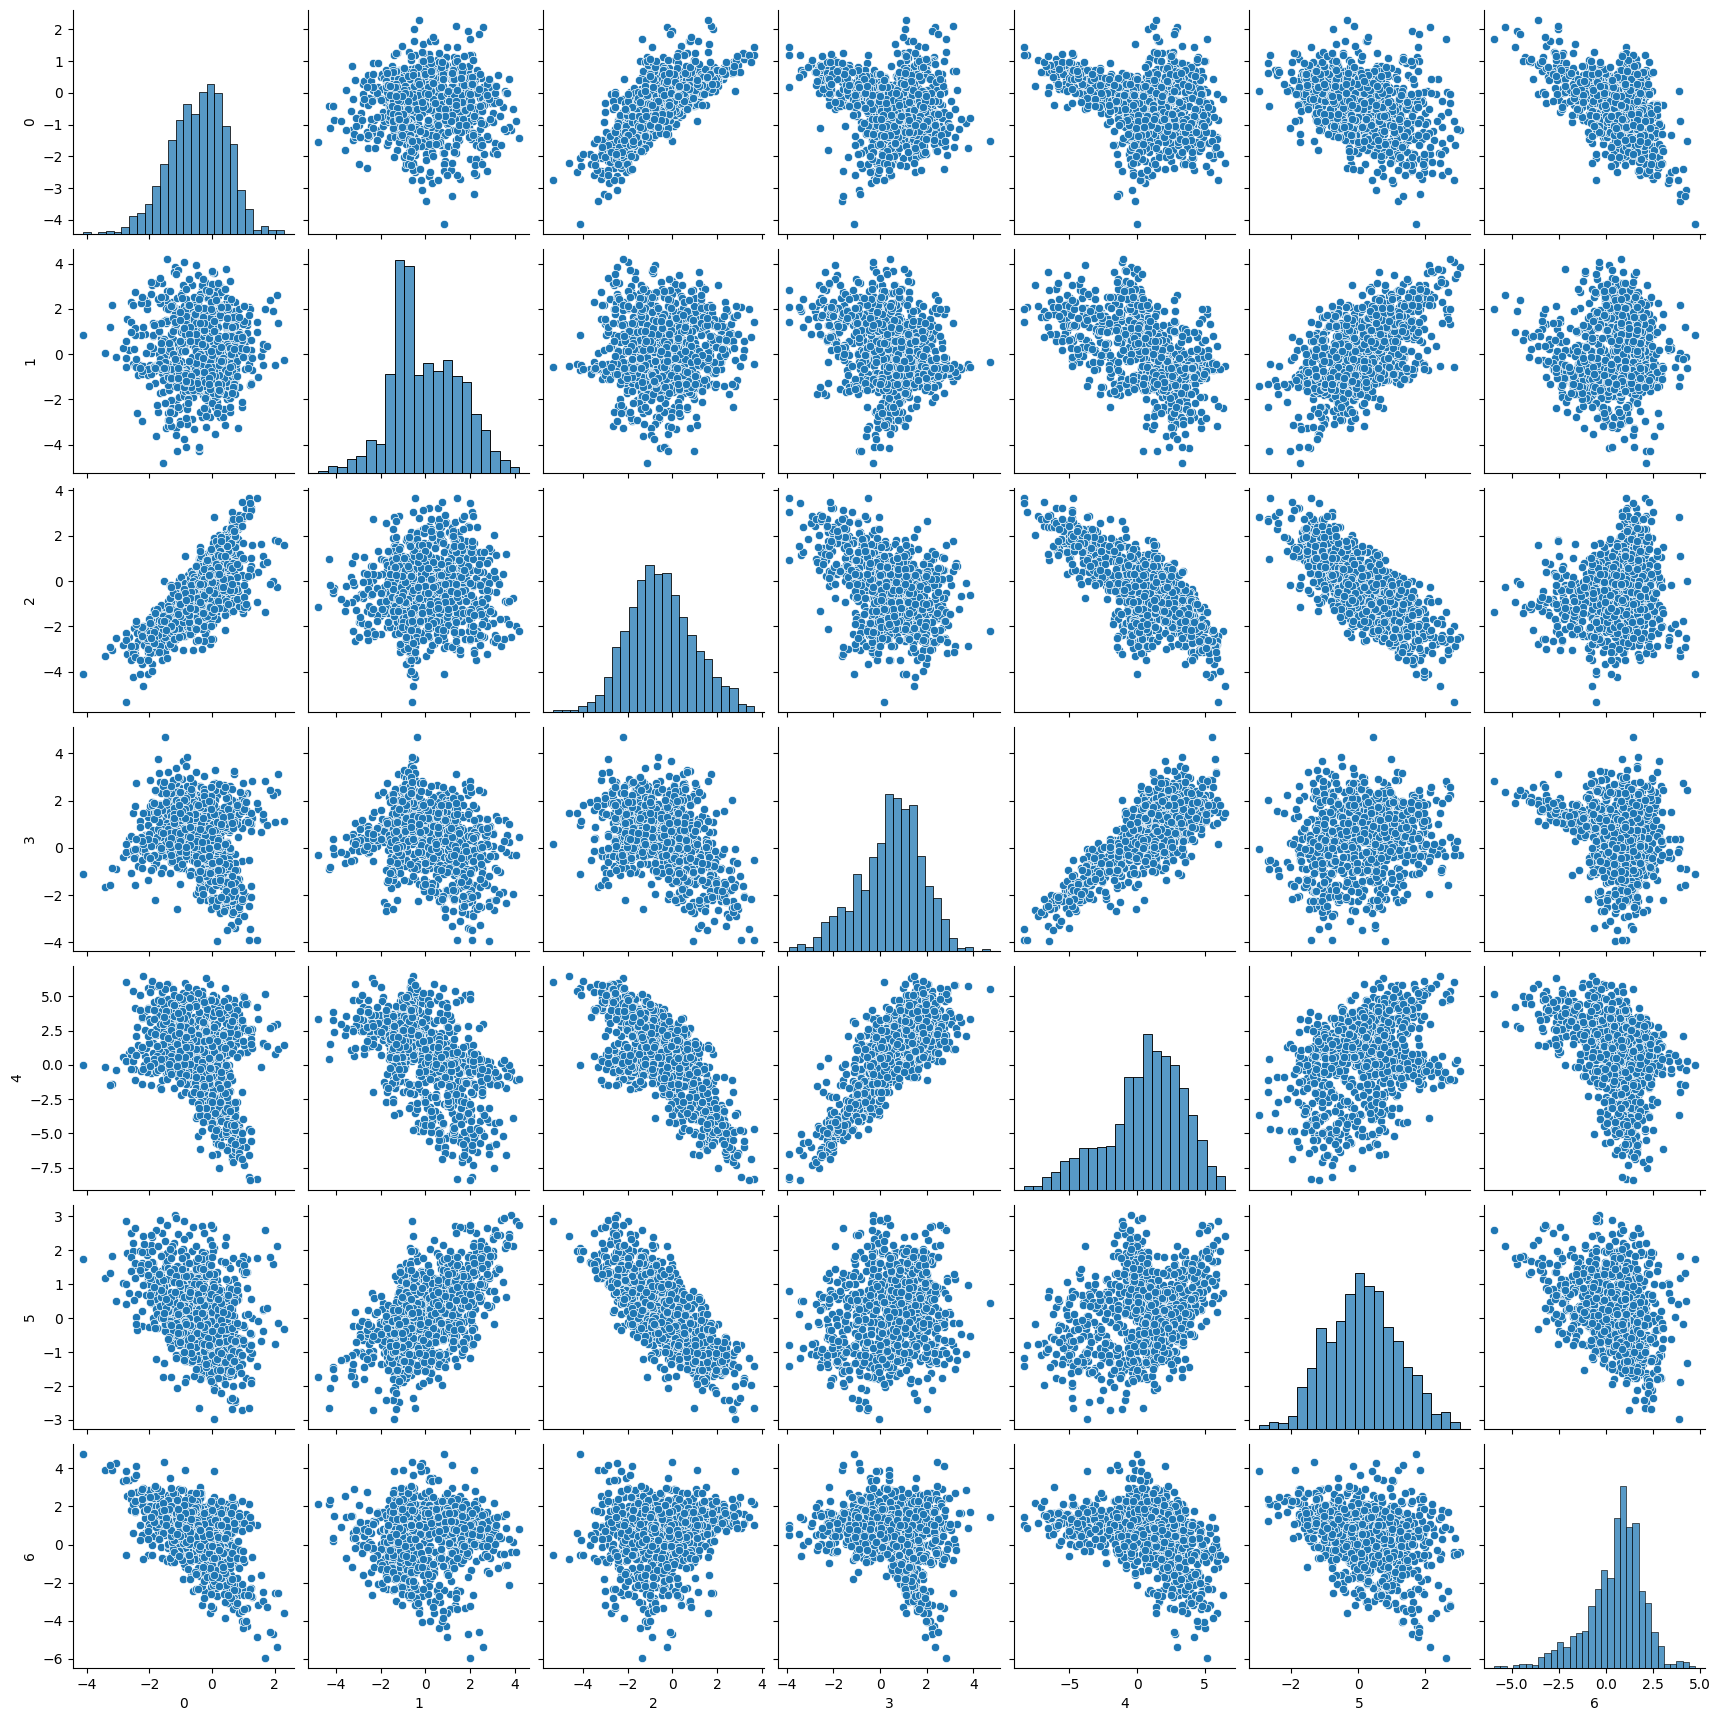

In [9]:
# Visualizing pairwise relationships in the dataset using Seaborn pairplot.
sns.pairplot(df)
plt.show()

## Step 4: Initiating Principle Component Analysis

In [18]:
from sklearn.decomposition import PCA

# Initialize PCA to analyze all 7 components and fit the data.
pca = PCA(7)
pca.fit(X)

PCA(n_components=7)

## Step 5: Analyzing PCA Results

In [19]:
# Display the explained variance ratio for each principal component.
pca.explained_variance_ratio_

array([6.26099097e-01, 1.76571429e-01, 1.43361396e-01, 5.39680775e-02,
       1.22682405e-16, 1.79680137e-17, 0.00000000e+00])

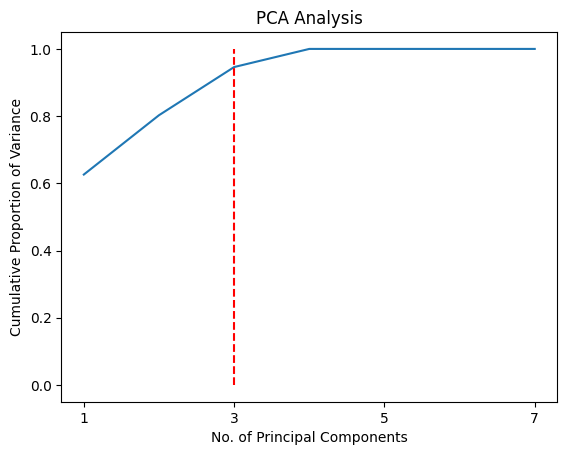

In [20]:
# Plot the cumulative explained variance ratio to determine the optimal number of components.
sns.lineplot(
    x = np.arange(1, 8), y = pca.explained_variance_ratio_.cumsum(),
    markers = True,
)
# Highlight the optimal number of components (e.g., 3) using a vertical line.
n = 3
plt.vlines(n, 0, 1, colors = "Red", linestyles = "--")
plt.xticks(range(1,8,2))
plt.ylabel("Cumulative Proportion of Variance")
plt.xlabel("No. of Principal Components")
plt.title("PCA Analysis")
plt.show()

## Step 6: Reducing Dimensionality with PCA

In [21]:
# Reinitialize PCA with the optimal number of components (3) and transform the data.
pca = PCA(3)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA

array([[ 2.89687616, -2.37589379, -0.37238912],
       [ 4.02956809, -0.6925155 ,  0.88794514],
       [-6.27203544, -1.65093623, -1.06047502],
       ...,
       [-9.20013345, -2.01675407, -0.42820498],
       [-8.68418542, -0.31329872, -1.56521921],
       [ 0.79720618, -1.99870345, -3.00232679]])

## Step 7: Visualizing PCA Results

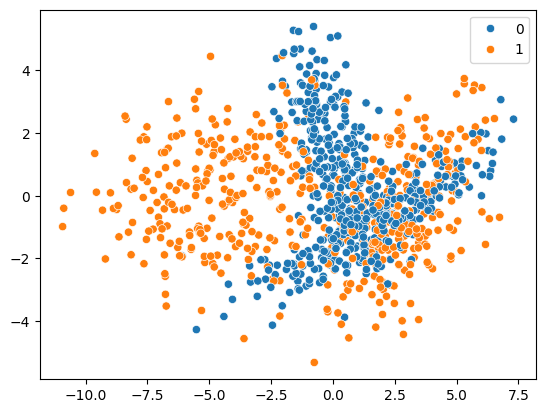

In [22]:
# Visualize the first two principal components using a scatter plot and color-code by target labels.
sns.scatterplot(x = X_PCA[:,0], y = X_PCA[:,1], hue = y)
plt.show()

## Step 8: Visualizing in 3D

In [23]:
# Visualize the first three principal components in 3D using Plotly.
import plotly.express as px

fig = px.scatter_3d(x=X_PCA[:,0], y=X_PCA[:,1], z=X_PCA[:,2],
                    color = y)

fig.show()